# Objective

Develop multiple regression model to predict the value of response variable (dependent/target/output variable) based on a set of features (independent/input variables). 
1. What should be included for regression analysis:
2. Make sure to include the equation of your regression model.
3. Make sure the interpretation of your regression model is included.
4. R2 and R2-adjusted value and their interpretations are included.
5. Calculate the correlation between input variables, as well as between inputs and output variables. 
6. Show Mean absolute error (MAE), and other measured that are discussed for regression analysis. 

# Dataset
The possum data frame consists of nine morphometric measurements on each of 104 mountain brushtail possums, trapped at seven sites from Southern Victoria to central Queensland.
Here using Regression method we will try to determine:
1. Can we use total length to predict a possum's head length?
2. Which possum body dimensions are most correlated with head length?
3. Using the maximum correlated columns, predict possum's head length.

In [1]:
!pip install statsmodels
!pip install bioinfokit

In [2]:
# importing basic libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [3]:
# importing the file from the system - using Pandas Libraries for it.
df = pd.read_csv(r"C:\Users\aniks\OneDrive\Documents\ASU\SCM 516\Team Assignment\archive\possum.csv")

In [4]:
# checking if the data is downloaded or not
df.head(10)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


In [5]:
# understanding the dimensions
df.shape

(104, 14)

In [6]:
# this implies we have 14 columns and 104 rows
# Checking about the data and if there are null values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [7]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [8]:
# So we can see there are few null values in age and footlength columns
# as we have 104 rows we are not going to remove the rows to avoid data loss
# both the columns are of type float64, we will populate the same with mean values for that column

In [8]:
df["age"].fillna(df['age'].mean(),inplace = True)

In [9]:
df["footlgth"].fillna(df['footlgth'].mean(),inplace = True)

In [10]:
# checkking the null values again
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [11]:

df.head(10)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


In [13]:
# Our data is in good shape to proceed with regression


# Can we use total length to predict a possum's head length?

In [11]:
# Let's check if the residula data will be normally distributed or not
#  here we will be concentrating on 2 columns -> X = df['totlngth'],y = df['hdlngth']

In [12]:
X=df[['totlngth']]
y = df[['hdlngth']]
print(X),print(y)

     totlngth
0        89.0
1        91.5
2        95.5
3        92.0
4        85.5
..        ...
99       81.5
100      82.5
101      89.0
102      82.5
103      89.0

[104 rows x 1 columns]
     hdlngth
0       94.1
1       92.5
2       94.0
3       93.2
4       91.5
..       ...
99      89.5
100     88.6
101     92.4
102     91.5
103     93.6

[104 rows x 1 columns]


(None, None)

Text(0.5, 1.0, 'Regression plot')

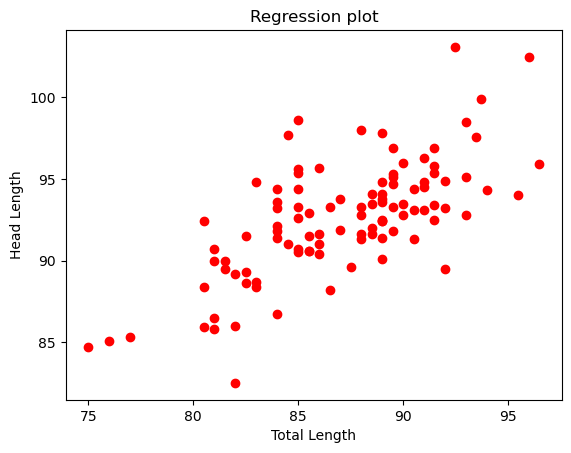

In [13]:
# let's plot a scatter and check if the any relation is obtained or not
plt.scatter(df['totlngth'],df['hdlngth'],color='r')
plt.xlabel("Total Length")
plt.ylabel("Head Length")
plt.title("Regression plot")

In [17]:
# [Here variance cannot be completely explained for column Y with Independent Variable X]
# Let's fit the model in linear regression to check out the value of R2_Score

In [14]:
X_train,X_test,y_train,y_test = tt(X,y,test_size = 0.3, random_state=1)

In [15]:
l_reg = LinearRegression()
l_reg.fit(X_train,y_train)

LinearRegression()

In [16]:
pred = l_reg.predict(X_test)

In [17]:
print(r2_score(y_test,pred))

0.5706613957890382


In [22]:
#The R2_Score is about 57% that means only 57% of the value of head length can be explained by Total Length
# and there are many independent variables that are required to determing the value of Y (dependent variable).

Text(0, 0.5, 'Head length')

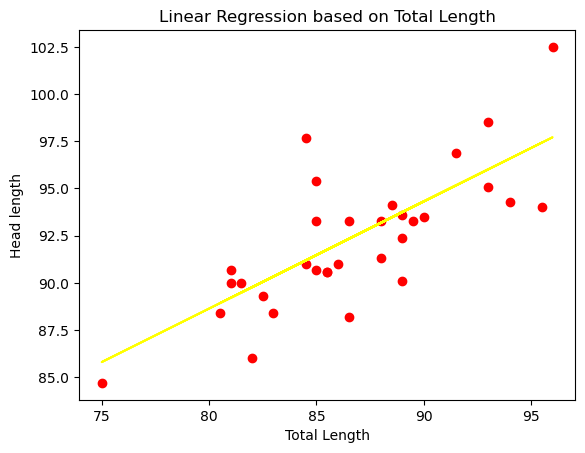

In [18]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test,pred,color = 'yellow')
plt.title('Linear Regression based on Total Length')
plt.xlabel('Total Length')
plt.ylabel('Head length')



In [19]:
# Checking Adjusted R-Square value
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                hdlngth   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     93.26
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           4.68e-16
Time:                        11:00:20   Log-Likelihood:                -245.75
No. Observations:                 104   AIC:                             495.5
Df Residuals:                     102   BIC:                             500.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.7098      5.173      8.257      0.000      32.450      52.970
totlngth       0.5729      0.059      9.657      0.000       0.455       0.691
==============================================================================
Omnibus:                        5.577   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                5.117
Skew:                           0.422   Prob(JB):                       0.0774
Kurtosis:                       3.684   Cond. No.                     1.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# As observed that values are not completely explaining the variance for the dependent variable,
#let's try with more columns present in the file and perform Multiple Linear Regression
# Checking Co-relation between the columns so that we take appropriate columns for the model.

C:\Users\aniks\AppData\Local\Temp\ipykernel_14012\3983996579.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = df.drop("case",axis=1).corr()


Text(0.5, 1.0, 'Correlation for the data')

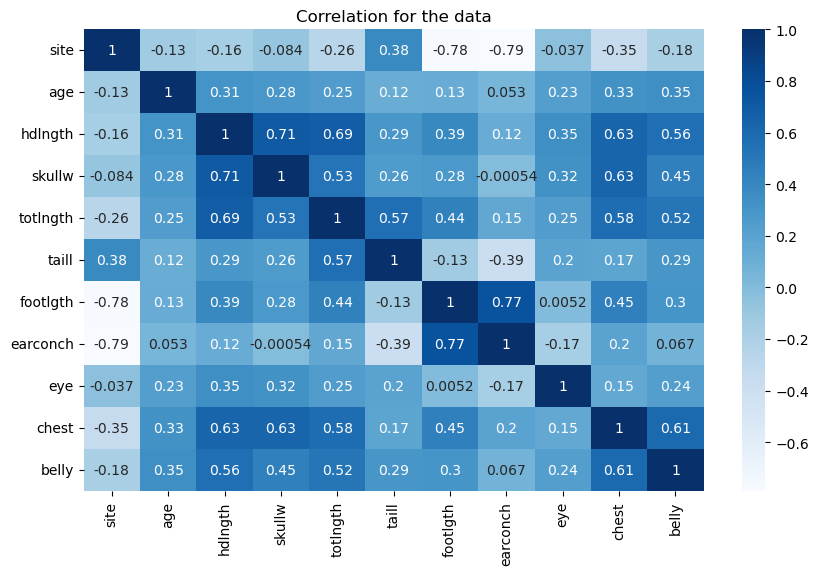

In [21]:
    correl = df.drop("case",axis=1).corr()
    plt.figure(figsize=(10,6))
    sns.heatmap(correl,cmap = 'Blues',annot = True)
    plt.title('Correlation for the data')


In [33]:
# As suggested above in the correlation plot, there are belly,chest,totlngth,skullw columns with correlation >0.5
X = df[['belly','chest','skullw','totlngth']]
X

,belly,chest,skullw,totlngth
0,36.0,28.0,60.4,89.0
1,33.0,28.5,57.6,91.5
2,34.0,30.0,60.0,95.5
3,34.0,28.0,57.1,92.0
4,33.0,28.5,56.3,85.5
...,...,...,...,...
99,27.0,23.0,56.0,81.5
100,33.0,25.0,54.7,82.5
101,30.0,25.0,55.0,89.0
102,29.0,25.0,55.2,82.5


In [34]:
y = df[['hdlngth']]
y

,hdlngth
0,94.1
1,92.5
2,94.0
3,93.2
4,91.5
...,...
99,89.5
100,88.6
101,92.4
102,91.5


In [35]:
# let's split this data and fit them in the model
X_train,Xtest,y_train,y_test = tt(X,y,test_size = 0.3,random_state = 1)
X_test

,totlngth
96,86.0
35,88.0
81,82.0
59,88.0
38,75.0
39,84.5
53,91.5
85,86.5
31,94.0
56,93.0


In [36]:
l_reg = LinearRegression()
l_reg.fit(X_train,y_train)

LinearRegression()

In [37]:
y_hat = l_reg.predict(Xtest)

In [38]:
# To check how accurate the model is, let's calculate few metrics here
mean_absolute_error(y_test,y_hat)

1.5095499203696172

In [39]:
mean_squared_error(y_test,y_hat)

3.677735528423837

In [40]:
# R2_score
R2 = r2_score(y_test,y_hat)
R2

0.7142387963503609

In [35]:
# this implies that 71% of the variance in the value of Head Length, can be explained, which is a far better and stable model

In [41]:
# Let's find the coefficient and slope for the equation
intercept = l_reg.intercept_
intercept

array([29.86503243])

In [42]:
slope = l_reg.coef_
slope

array([[0.28095813, 0.0514124 , 0.43809086, 0.31357863]])

In [38]:
# Let's obtain the equation as per these parameters
# Y-hat = mx+c, but this is a multiple linear regression, therefore equation will be:

# Y-hat = 0.28095813*X1+0.0514124*X2+0.31357863*X3+0.43809086*X4 + 29.86503243



Text(0.1, 0.8, 'R2 = 0.71')

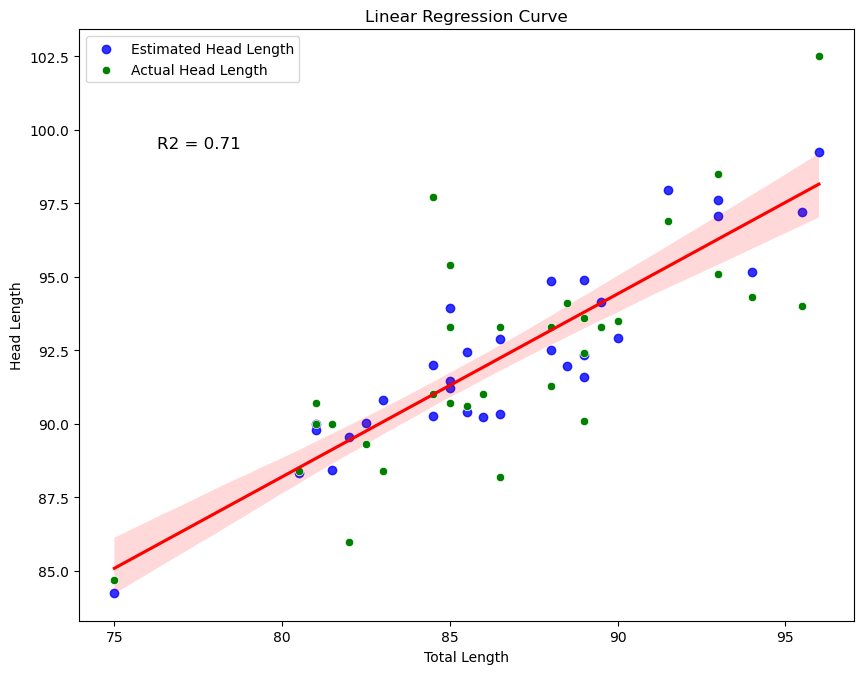

In [43]:
# as we have the required details, let's find out the regression plot here with the most strongly correlated X value column
plt.figure(figsize = (10,7.68))
sns.regplot(x=X_test['totlngth'].values, y=y_hat, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, label='Estimated Head Length')
sns.scatterplot(x=X_test['totlngth'].values, y=y_test['hdlngth'].values, color='green', label='Actual Head Length')

# Add labels and title
plt.xlabel('Total Length')
plt.ylabel('Head Length')
plt.title('Linear Regression Curve')

# Adding R2_Score to the curve
plt.text(0.1, 0.8, f'R2 = {R2:.2f}', transform=plt.gca().transAxes, fontsize=12)


In [47]:
# Let's check if we fit the same equation in to a Polynomial Fucntion will the R2_Score change ?
pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X_train)
pf.fit(X_poly, y_train)

l_reg.fit(X_poly, y_train)

LinearRegression()

In [48]:
X_poly_test = pf.fit_transform(Xtest)
pred_poly = l_reg.predict(X_poly_test)

In [49]:
print(r2_score(y_test,pred_poly))

0.6552753508428861


In [50]:
print('R2 for Linear Regression is: ',r2_score(y_test,y_hat))
print('R2 for Polynomial Regression is: ',r2_score(y_test,pred_poly))


R2 for Linear Regression is:  0.7142387963503609
R2 for Polynomial Regression is:  0.6552753508428861


In [51]:
# Checking Adjusted R-Square value
X1 = sm.add_constant(y_hat)
model = sm.OLS(y_test, X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                hdlngth   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     75.94
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           1.02e-09
Time:                        11:14:09   Log-Likelihood:                -66.097
No. Observations:                  32   AIC:                             136.2
Df Residuals:                      30   BIC:                             139.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0390     10.129      0.399      0.693     -16.647      24.725
x1             0.9550      0.110      8.715      0.000       0.731       1.179
==============================================================================
Omnibus:                        5.612   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                3.982
Skew:                           0.696   Prob(JB):                        0.137
Kurtosis:                       4.024   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# Increasing the degree reduced the R2_Score, so we will be sticking with multiple linear regress instead of Polynomial regression

In [52]:
# From the initial phase there was only 1 assumption if the data is normally distributed or not

y_residual = y_test - y_hat
y_residual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 96 to 2
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   hdlngth  32 non-null     float64
dtypes: float64(1)
memory usage: 512.0 bytes


<Axes: xlabel='totlngth', ylabel='hdlngth'>

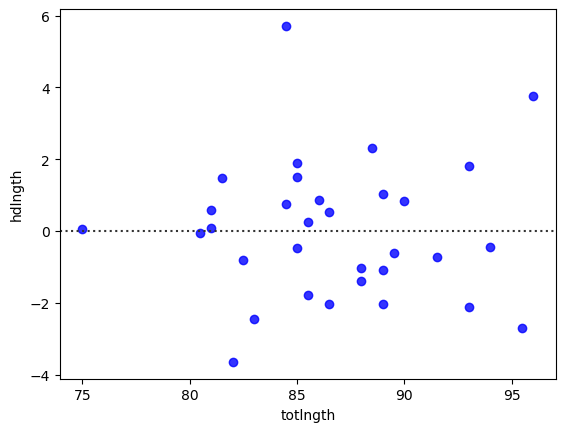

In [53]:
sns.residplot(x=X_test['totlngth'],y=y_residual['hdlngth'],color='b')


In [53]:
# We can see almost equal number of data points are distributed around residual = 0, therefore our assumption that data is 
# normally distributed is true.

In [54]:
# Checking the correlation between Input and Output Variables
data1 = pd.DataFrame({})
data1 = X_test.iloc[:,:]
data1['hdlngth'] = y_test['hdlngth']
data1['y_hat'] = y_hat
data1

,totlngth,hdlngth,y_hat
96,86.0,91.0,90.230910
35,88.0,93.3,94.864249
81,82.0,86.0,89.562769
59,88.0,91.3,92.503261
38,75.0,84.7,84.254372
39,84.5,91.0,90.274302
53,91.5,96.9,97.954545
85,86.5,88.2,90.342442
31,94.0,94.3,95.173299
56,93.0,95.1,97.601593


<Axes: >

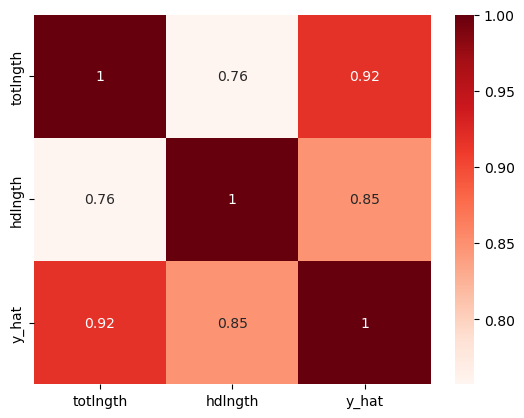

In [55]:
corel1 = data1.corr()
sns.heatmap(corel1,cmap = 'Reds',annot=True)